In [ ]:
!pip install sentence-transformers

import pandas as pd
from sentence_transformers import SentenceTransformer, util

# Load the CSV file
try:
  df = pd.read_csv("chat.csv")
except FileNotFoundError:
  print("Error: File not found. Please check the file path.")
  exit()

# Check if 'text' column exists
if 'text' not in df.columns:
  print("Error: 'text' column not found in the CSV file.")
  exit()

# Load the Sentence Transformer model
model = SentenceTransformer('all-mpnet-base-v2')

# Encode the text column
sentences = df['text'].tolist()
sentences = [str(sentence) for sentence in sentences]

embeddings = model.encode(sentences)

# Calculate cosine similarity (example)
cosine_similarities = util.cos_sim(embeddings, embeddings)

# Now you can work with the embeddings and cosine similarities
# Example: Print the shape of the cosine similarity matrix
print(cosine_similarities.shape)

# Example: Print the cosine similarity between the first and second sentences
print(cosine_similarities[0, 1])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

KeyboardInterrupt: 

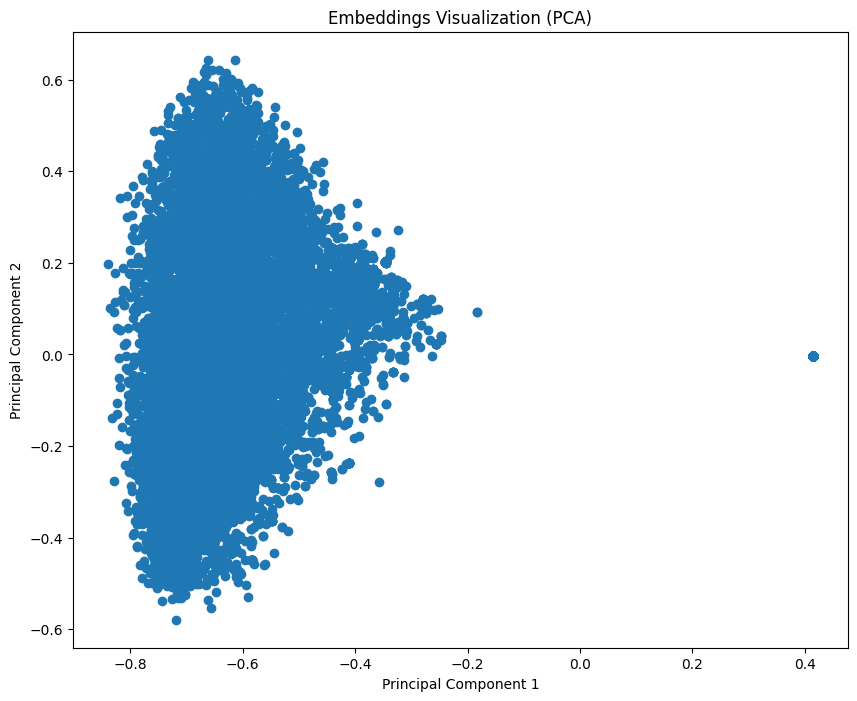

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#-----------------------------------------
# reduce to 50 dimensions and then run tsne
# color by tangram
#-----------------------------------------

# Reduce dimensions using PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
reduced_embeddings = pca.fit_transform(embeddings)

# Visualize the embeddings
plt.figure(figsize=(10, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
plt.title("Embeddings Visualization (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Annotate some points (optional)
# for i, txt in enumerate(sentences[:20]): # only first 20 to avoid overcrowding
#   plt.annotate(txt[:15], (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

plt.show()


In [ ]:
import pandas as pd
import numpy as np
import torch
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from pathlib import Path

In [ ]:
mpt = pd.read_csv("mpt.csv")
respect = pd.read_csv("hawkins_respect_code.csv")
dynamics = pd.read_csv("hawkins_dynamics.csv")
combined = pd.concat([mpt, respect, dynamics], ignore_index=True)

<ipython-input-3-b29cbe3c8f65>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  mpt = pd.read_csv("mpt.csv")


In [ ]:
combined.columns

Index(['paper_id', 'experiment_id', 'game_id', 'player_id', 'trial_num',
       'rep_num', 'role', 'target_id', 'message_num', 'message', 'choice_id',
       'time_to_choice', 'option_set', 'group_size', 'structure'],
      dtype='object')

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')  # lightweight but good

# Assume you want to embed a column like "utterance" or "text" (adjust column name)
texts = combined['message'].fillna("").tolist()
embeddings = model.encode(texts, convert_to_tensor=True)

# Add embeddings back if needed
combined['embedding'] = list(embeddings.cpu().numpy())



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
combined.to_csv("embeddings.csv", index=False)

In [53]:
import pandas as pd

df = pd.read_csv("embeddings.csv")

<ipython-input-53-bad621fbfac2>:3: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("embeddings.csv")


In [54]:
df.head(10)

,paper_id,experiment_id,game_id,player_id,trial_num,rep_num,role,target_id,message_num,message,choice_id,time_to_choice,option_set,group_size,structure,embedding
0,boyce2024_interaction,4_rotate,3WzEi9zkHF77vdTw5,qZYMtuyj2SBfZk8XH,1,1,describer,G,1.0,ok so it's kind of like a dog lying down,NaN,NaN,NaN,4,medium,[-3.19991447e-03 -3.51237431e-02 2.16443911e-...
1,boyce2024_interaction,4_rotate,3WzEi9zkHF77vdTw5,qZYMtuyj2SBfZk8XH,1,1,describer,G,2.0,it's a long shape on the bottom of the square ...,NaN,NaN,NaN,4,medium,[ 8.35555792e-02 2.84576323e-02 -4.19230275e-...
2,boyce2024_interaction,4_rotate,3WzEi9zkHF77vdTw5,ieBYKaxXNCy2QcwJj,1,1,matcher,G,3.0,fully down or stretching,NaN,NaN,NaN,4,medium,[ 2.01982222e-02 5.06278351e-02 -2.94462778e-...
3,boyce2024_interaction,4_rotate,3WzEi9zkHF77vdTw5,qZYMtuyj2SBfZk8XH,2,1,describer,L,1.0,ok so it's like a guy sort of crouching with h...,NaN,NaN,NaN,4,medium,[-1.12979207e-02 3.18369903e-02 -1.74426977e-...
4,boyce2024_interaction,4_rotate,3WzEi9zkHF77vdTw5,wXsGgzkQgoofFhxwk,2,1,matcher,L,2.0,facing right or left,NaN,NaN,NaN,4,medium,[-1.10582076e-02 6.32565282e-03 -3.23505625e-...
5,boyce2024_interaction,4_rotate,3WzEi9zkHF77vdTw5,qZYMtuyj2SBfZk8XH,2,1,describer,L,3.0,right,NaN,NaN,NaN,4,medium,[-5.4861862e-02 4.7606595e-02 -3.2625843e-02 ...
6,boyce2024_interaction,4_rotate,3WzEi9zkHF77vdTw5,qZYMtuyj2SBfZk8XH,2,1,describer,L,4.0,like 2 rhombuses on the bottom with a square o...,NaN,NaN,NaN,4,medium,[ 6.97954819e-02 3.67323868e-02 -5.72718270e-...
7,boyce2024_interaction,4_rotate,3WzEi9zkHF77vdTw5,qZYMtuyj2SBfZk8XH,2,1,describer,L,5.0,but the triangle isnt small,NaN,NaN,NaN,4,medium,[ 1.22736402e-01 1.04610413e-01 -8.18242207e-...
8,boyce2024_interaction,4_rotate,3WzEi9zkHF77vdTw5,qZYMtuyj2SBfZk8XH,3,1,describer,C,1.0,it's like an angel flying,NaN,NaN,NaN,4,medium,[ 2.33078189e-02 5.97222941e-03 -6.88750716e-...
9,boyce2024_interaction,4_rotate,3WzEi9zkHF77vdTw5,qZYMtuyj2SBfZk8XH,3,1,describer,C,2.0,it's like a rhombus with diamond in the top co...,NaN,NaN,NaN,4,medium,[ 3.25655565e-02 9.08765718e-02 -5.55719472e-...


In [55]:
df.columns

Index(['paper_id', 'experiment_id', 'game_id', 'player_id', 'trial_num',
       'rep_num', 'role', 'target_id', 'message_num', 'message', 'choice_id',
       'time_to_choice', 'option_set', 'group_size', 'structure', 'embedding'],
      dtype='object')

In [56]:
import re
import numpy as np

def safe_parse_embedding(x):
    if isinstance(x, str):
        try:
            # Remove any 'array(...)' wrapper or extra characters
            x = re.sub(r'array\(|\)', '', x)
            x = x.replace('\n', ' ').replace('[ ', '[').replace(' ]', ']')
            numbers = [float(val) for val in re.findall(r'-?\d+\.?\d*', x)]
            return np.array(numbers, dtype=np.float32)
        except Exception as e:
            print(f"Parse failed: {e}")
            return np.nan
    return np.nan

df['embedding'] = df['embedding'].apply(safe_parse_embedding)
df = df.dropna(subset=['embedding'])

# Check result
print(df['embedding'].head())


0    [-3.1999145, -3.0, -3.5123744, -2.0, 2.1644392...
1    [8.355558, -2.0, 2.8457632, -2.0, -4.1923027, ...
2    [2.0198221, -2.0, 5.0627837, -2.0, -2.9446278,...
3    [-1.1297921, -2.0, 3.1836991, -2.0, -1.7442697...
4    [-1.1058208, -2.0, 6.3256526, -3.0, -3.2350562...
Name: embedding, dtype: object


In [57]:
df

,paper_id,experiment_id,game_id,player_id,trial_num,rep_num,role,target_id,message_num,message,choice_id,time_to_choice,option_set,group_size,structure,embedding
0,boyce2024_interaction,4_rotate,3WzEi9zkHF77vdTw5,qZYMtuyj2SBfZk8XH,1,1,describer,G,1.0,ok so it's kind of like a dog lying down,NaN,NaN,NaN,4,medium,"[-3.1999145, -3.0, -3.5123744, -2.0, 2.1644392..."
1,boyce2024_interaction,4_rotate,3WzEi9zkHF77vdTw5,qZYMtuyj2SBfZk8XH,1,1,describer,G,2.0,it's a long shape on the bottom of the square ...,NaN,NaN,NaN,4,medium,"[8.355558, -2.0, 2.8457632, -2.0, -4.1923027, ..."
2,boyce2024_interaction,4_rotate,3WzEi9zkHF77vdTw5,ieBYKaxXNCy2QcwJj,1,1,matcher,G,3.0,fully down or stretching,NaN,NaN,NaN,4,medium,"[2.0198221, -2.0, 5.0627837, -2.0, -2.9446278,..."
3,boyce2024_interaction,4_rotate,3WzEi9zkHF77vdTw5,qZYMtuyj2SBfZk8XH,2,1,describer,L,1.0,ok so it's like a guy sort of crouching with h...,NaN,NaN,NaN,4,medium,"[-1.1297921, -2.0, 3.1836991, -2.0, -1.7442697..."
4,boyce2024_interaction,4_rotate,3WzEi9zkHF77vdTw5,wXsGgzkQgoofFhxwk,2,1,matcher,L,2.0,facing right or left,NaN,NaN,NaN,4,medium,"[-1.1058208, -2.0, 6.3256526, -3.0, -3.2350562..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130756,hawkins2020_characterizing,cued,5100-ae37a906-ac5a-4cf2-b89a-aeb68b66e2b2,5100-ae37a906-ac5a-4cf2-b89a-aeb68b66e2b2director,68,6,describer,A,1.0,pack on back,A,NaN,NaN,2,thick,"[7.4975476, -3.0, 4.0791025, -2.0, -5.1584544,..."
130757,hawkins2020_characterizing,cued,5100-ae37a906-ac5a-4cf2-b89a-aeb68b66e2b2,5100-ae37a906-ac5a-4cf2-b89a-aeb68b66e2b2director,69,6,describer,F,1.0,"mourning, looking down",F,NaN,NaN,2,thick,"[3.999075, -2.0, 3.728431, -2.0, 3.5124016, -2..."
130758,hawkins2020_characterizing,cued,5100-ae37a906-ac5a-4cf2-b89a-aeb68b66e2b2,5100-ae37a906-ac5a-4cf2-b89a-aeb68b66e2b2director,70,6,describer,H,1.0,"kneeling,no limbs extended",H,NaN,NaN,2,thick,"[2.6867914, -2.0, 8.452446, -2.0, 7.7104197, -..."
130759,hawkins2020_characterizing,cued,5100-ae37a906-ac5a-4cf2-b89a-aeb68b66e2b2,5100-ae37a906-ac5a-4cf2-b89a-aeb68b66e2b2director,71,6,describer,I,1.0,"one foot on ground, other leg extended backward",I,NaN,NaN,2,thick,"[-4.9075203, -2.0, -4.069655, -3.0, 2.5218873,..."


In [67]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go

def compute_gamewise_similarity(df, time_col='trial_num'):
    game_avg_sims = {}

    for game_id, game_df in df.groupby('game_id'):
        tangram_sims = []

        for target_id, tg_df in game_df.groupby('target_id'):
            tg_df = tg_df.sort_values(by=time_col)
            if len(tg_df) < 2:
                continue

            base_emb = tg_df.iloc[0]['embedding'].reshape(1, -1)
            sims = [
                cosine_similarity(base_emb, emb.reshape(1, -1))[0, 0]
                for emb in tg_df['embedding']
            ]

            temp_df = pd.DataFrame({
                time_col: tg_df[time_col].values,
                'cosine_sim': sims
            })
            tangram_sims.append(temp_df)

        if not tangram_sims:
            continue

        all_tg_df = pd.concat(tangram_sims)
        avg_sim = all_tg_df.groupby(time_col)['cosine_sim'].mean().sort_index()
        game_avg_sims[game_id] = (avg_sim.index.to_numpy(), avg_sim.values)

    return game_avg_sims


import numpy as np
import plotly.graph_objects as go

def plot_interactive_with_regression(game_avg_sims, time_label='Trial Number'):
    fig = go.Figure()

    all_x, all_y = [], []

    # Plot all games' cosine trajectories
    for game_id, (x, y) in game_avg_sims.items():
        if len(x) >= 2 and not np.any(np.isnan(y)):
            fig.add_trace(go.Scatter(
                x=x,
                y=y,
                mode='lines+markers',
                name=f'Game {game_id}',
                line=dict(width=1),
                opacity=0.4,
                hovertemplate=f'Game {game_id}<br>{time_label}: %{{x}}<br>Similarity: %{{y:.2f}}'
            ))
            all_x.extend(x)
            all_y.extend(y)

    # Fit one global regression line
    coeffs = np.polyfit(all_x, all_y, deg=1)
    x_fit = np.linspace(min(all_x), max(all_x), 100)
    y_fit = np.polyval(coeffs, x_fit)

    fig.add_trace(go.Scatter(
        x=x_fit,
        y=y_fit,
        mode='lines',
        name='Global Regression Line',
        line=dict(color='black', width=4, dash='dot'),
        hoverinfo='skip'
    ))

    fig.update_layout(
        title="SBERT Cosine Similarity Across Trials (1 Global Regression Line)",
        xaxis_title=time_label,
        yaxis_title="Mean Cosine Similarity to First Round",
        template="plotly_white",
        height=600,
        legend_title="Game ID"
    )

    fig.show()


In [63]:
game_avg_sims = compute_gamewise_similarity(df, time_col='trial_num')

In [68]:
plot_interactive_with_regression(game_avg_sims, time_label='Trial Number')

In [69]:
game_avg_sims = compute_gamewise_similarity(df, time_col='rep_num')

In [70]:
plot_interactive_with_regression(game_avg_sims, time_label='Repetition Number')

In [71]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np
import plotly.graph_objects as go

def compute_cross_game_repetition_similarity(df):
    tangram_sims = {}

    for target_id, tg_df in df.groupby('target_id'):
        tg_df = tg_df.sort_values(by='rep_num')
        if len(tg_df) < 2:
            continue  # skip if only one repetition

        base_emb = tg_df.iloc[0]['embedding'].reshape(1, -1)
        sims = [
            cosine_similarity(base_emb, emb.reshape(1, -1))[0, 0]
            for emb in tg_df['embedding']
        ]

        temp_df = pd.DataFrame({
            'rep_num': tg_df['rep_num'].values,
            'cosine_sim': sims
        })

        avg_sim = temp_df.groupby('rep_num')['cosine_sim'].mean().sort_index()
        tangram_sims[target_id] = (avg_sim.index.to_numpy(), avg_sim.values)

    return tangram_sims

def plot_cross_game_repetition_similarity(tangram_sims):
    fig = go.Figure()

    for target_id, (x, y) in tangram_sims.items():
        if len(x) >= 2 and not np.any(np.isnan(y)):
            fig.add_trace(go.Scatter(
                x=x,
                y=y,
                mode='lines+markers',
                name=f'Tangram {target_id}',
                hovertemplate=f'Tangram {target_id}<br>Repetition: %{{x}}<br>Similarity: %{{y:.2f}}'
            ))

    fig.update_layout(
        title="Cross-Game SBERT Similarity for Same Tangram Across Repetitions",
        xaxis_title='Repetition Number (rep_num)',
        yaxis_title='Cosine Similarity to First Repetition',
        template='plotly_white',
        height=600,
        legend_title='Tangram ID'
    )

    fig.show()


In [72]:
tangram_repetition_sims = compute_cross_game_repetition_similarity(df)
plot_cross_game_repetition_similarity(tangram_repetition_sims)